In [23]:
# Importing all the necessary lobraries for the analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [25]:
# Finding the number of rows and columns
df.shape

(48895, 16)

In [27]:
# Finding the basic informations about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [29]:
# Finding the number of duplicate values in the datset
column_wise_dup = {}
for column in df.columns:
    duplicates_count = df[column].duplicated().sum()
    column_wise_dup[column] = duplicates_count
print("Duplicate values in everry column")
print(column_wise_dup)

Duplicate values in everry column
{'id': 0, 'name': 998, 'host_id': 11438, 'host_name': 37442, 'neighbourhood_group': 48890, 'neighbourhood': 48674, 'latitude': 29847, 'longitude': 34177, 'room_type': 48892, 'price': 48221, 'minimum_nights': 48786, 'number_of_reviews': 48501, 'last_review': 47130, 'reviews_per_month': 47957, 'calculated_host_listings_count': 48848, 'availability_365': 48529}


In [31]:
# Checking for missig values
values_missing= df.isna().sum()
values_missing

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [33]:
# Repalcing the missing values
value_tobe_added={'name':'no name','host_name':'no hostname'}
df.fillna(value=value_tobe_added,inplace=True)

In [35]:
#Deleting the not usefull colums
to_deletecols = ['last_review','reviews_per_month']
df.drop(columns=to_deletecols, axis=1, inplace=True)

In [37]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,4,188


In [39]:
# Again checking for null values
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [41]:
df.shape

(48895, 14)

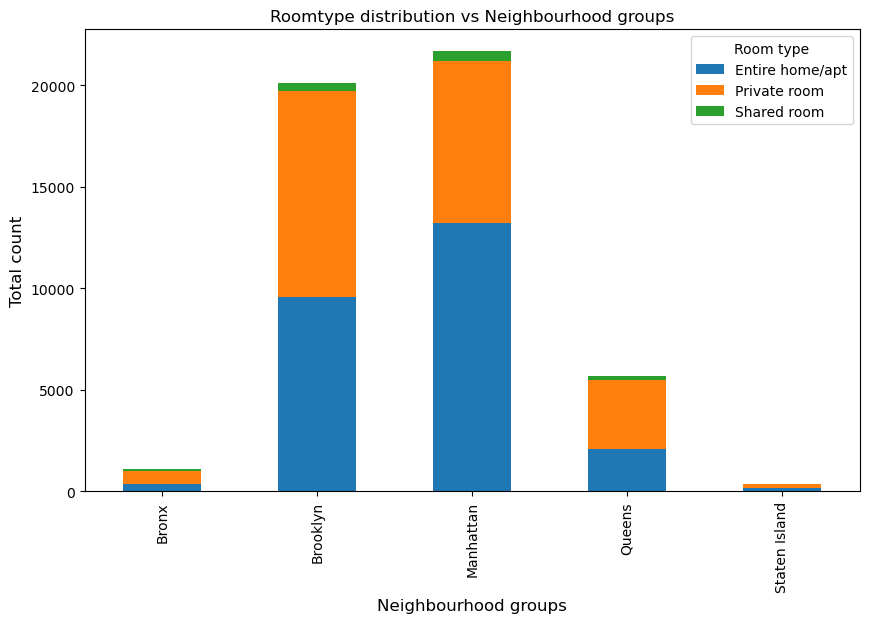

In [21]:
# Ploting stacked bar graph
ploting_columns= df.groupby(['neighbourhood_group', 'room_type']).size().unstack(fill_value=0)
ploting_columns.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Roomtype distribution vs Neighbourhood groups')
plt.xlabel('Neighbourhood groups',fontsize='12')
plt.ylabel('Total count',fontsize='12')
plt.legend(title='Room type')
plt.show()

In [43]:
listings_count = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
sorted_listing = listings_count.sort_values(by='calculated_host_listings_count', ascending=False)
sorted_listing.head(10)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7479,Kazuya,Manhattan,103
7480,Kazuya,Queens,103
7478,Kazuya,Brooklyn,103
6540,Jeremy & Laura,Manhattan,96
13216,Sonder,Manhattan,96
2901,Corporate Housing,Manhattan,91


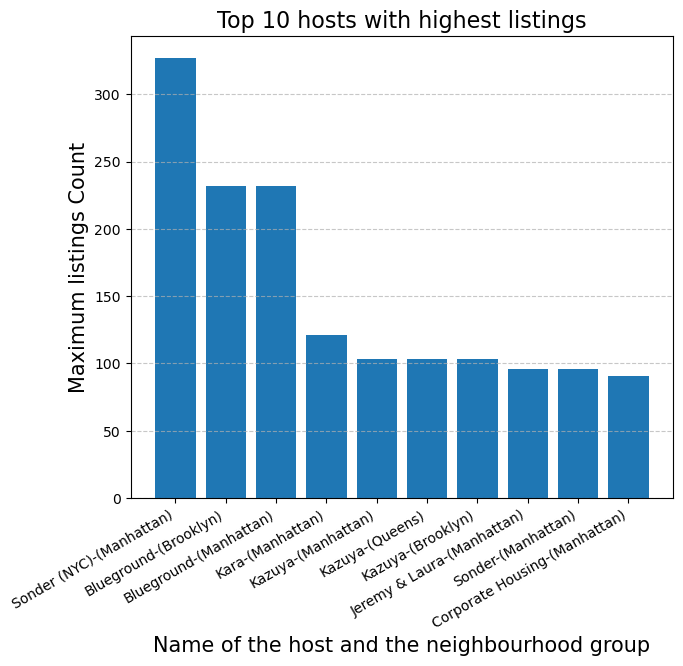

In [55]:
# Plotting the bar graph
sorted_listing['neighbourhood__group'] = sorted_listing['host_name'] + '-(' + sorted_listing['neighbourhood_group'] + ')'
plt.figure(figsize=(7, 6))
bars = plt.bar(sorted_listing['neighbourhood__group'][:10],
               sorted_listing['calculated_host_listings_count'][:10])
plt.xlabel('Name of the host and the neighbourhood group',fontsize=15)
plt.ylabel('Maximum listings Count',fontsize=15)
plt.title('Top 10 hosts with highest listings',fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

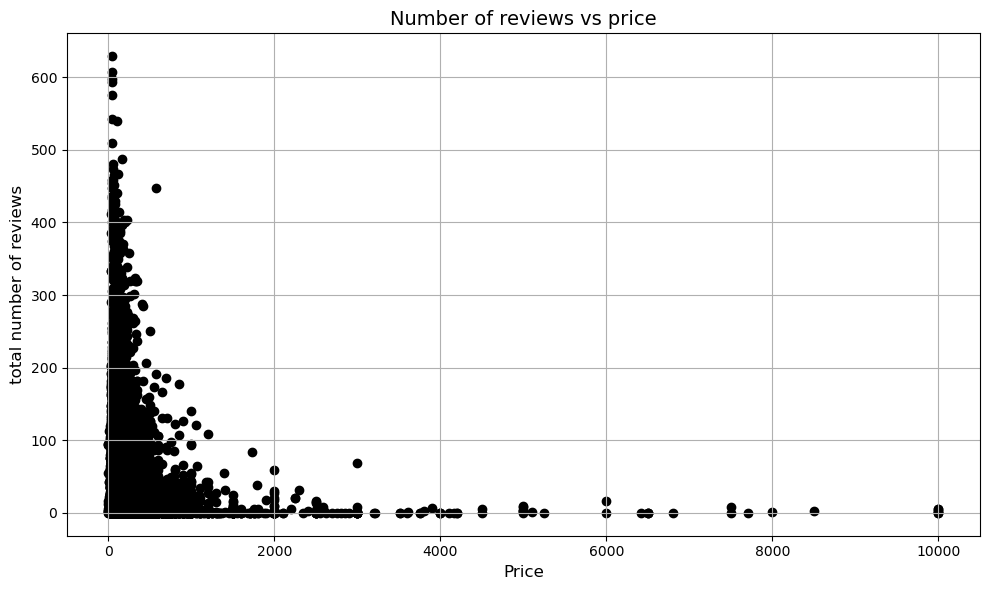

In [57]:
# Ploting the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['price'],df['number_of_reviews'],marker='o', linestyle='-',color='black')
plt.xlabel('Price',fontsize=12)
plt.grid(True)
plt.ylabel('total number of reviews',fontsize=12)
plt.title('Number of reviews vs price',fontsize=14)
plt.tight_layout()
plt.show()

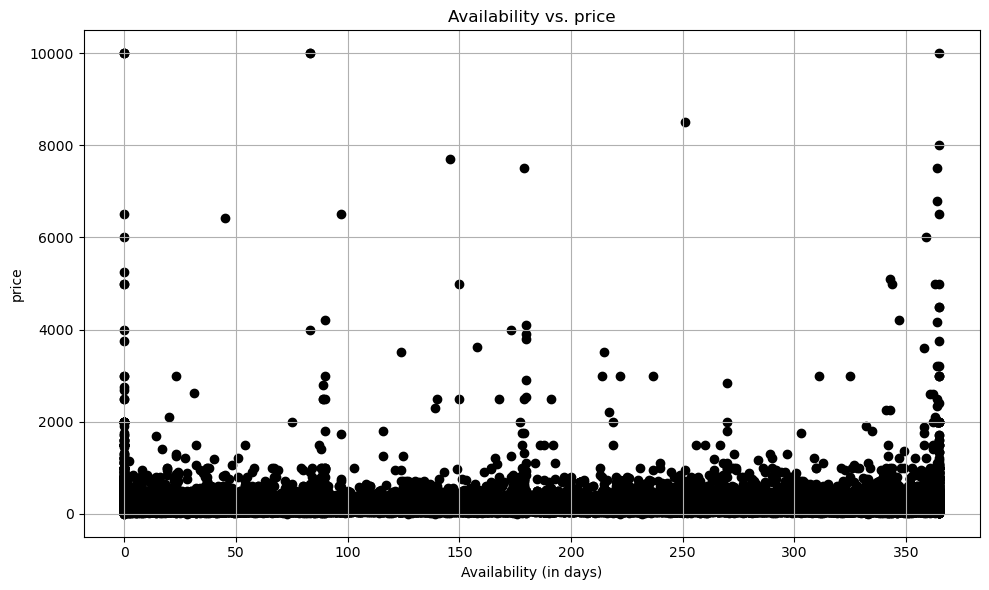

In [69]:
# Ploting the scatter pllot
plt.figure(figsize=(10, 6))
plt.scatter(df['availability_365'], df['price'],marker='o', linestyle='-',color='black')
plt.xlabel('Availability (in days)')
plt.ylabel('price')
plt.title('Availability vs. price')
plt.grid(True)
plt.tight_layout()
plt.show()

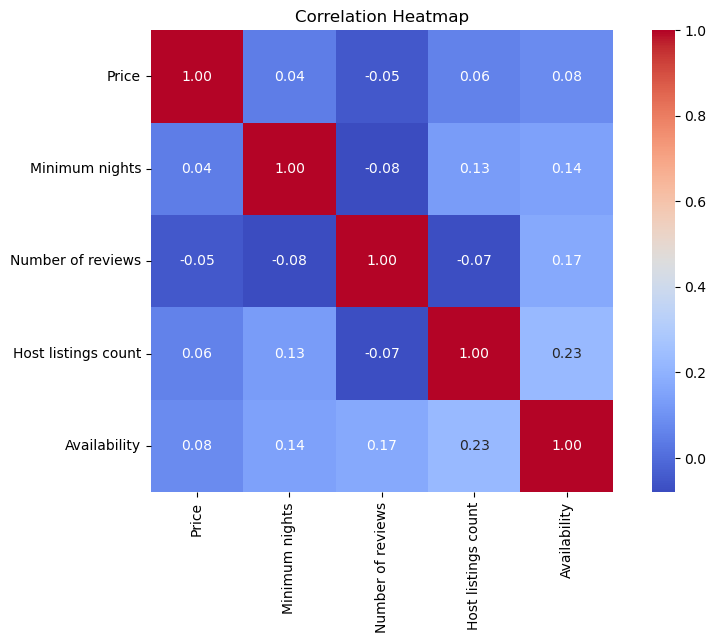

In [61]:
# Ploting the heatmap
columns = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
datas= df[columns]
new_names = ['Price', 'Minimum nights', 'Number of reviews', 'Host listings count', 'Availability']
datas.columns = new_names

correlation= datas.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()